# Analistar os dados de COVID em Piên

In [1]:
# import libs and open csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.io import curdoc
from bokeh.models.glyphs import Text
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d


#Definição do estilo e tamanho da fig
# plt.style.use('bmh')
# plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 180

output_notebook() # Para plotar inline. Sem isso, em outra janela .html
curdoc().theme = 'light_minimal'


df = pd.read_csv("../junho/covid_pien_26_06_2021.csv", sep=';')
df.info()

Loading BokehJS ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   IBGE_RES_PR                  1457 non-null   int64 
 1   IBGE_ATEND_PR                1457 non-null   int64 
 2   SEXO                         1457 non-null   object
 3   IDADE_ORIGINAL               1457 non-null   int64 
 4   MUN_RESIDENCIA               1457 non-null   object
 5   MUN_ATENDIMENTO              1209 non-null   object
 6   LABORATORIO                  1448 non-null   object
 7   DATA_DIAGNOSTICO             1457 non-null   object
 8   DATA_CONFIRMACAO_DIVULGACAO  1457 non-null   object
 9   DATA_INICIO_SINTOMAS         1409 non-null   object
 10  OBITO                        1257 non-null   object
 11  DATA_OBITO                   17 non-null     object
 12  DATA_OBITO_DIVULGACAO        17 non-null     object
 13  STATUS                       1240

In [3]:
# Tratar dados datetime
# Tratar dados com NaN
# Preenchendo valores NaN
df['MUN_ATENDIMENTO'] = df['MUN_ATENDIMENTO'].fillna("Não informado")
df['OBITO'] = df['OBITO'].fillna("Não informado")
df['STATUS'] = df['STATUS'].fillna("Não informado")
df['FONTE_DADO_RECUPERADO'] = df['FONTE_DADO_RECUPERADO'].fillna("Não informado")

# Alterando os campos do tipo datetime
df['DATA_DIAGNOSTICO'] = pd.to_datetime(df['DATA_DIAGNOSTICO'], dayfirst=True)
df['DATA_CONFIRMACAO_DIVULGACAO'] = pd.to_datetime(df['DATA_CONFIRMACAO_DIVULGACAO'], dayfirst=True)
df['DATA_INICIO_SINTOMAS'] = pd.to_datetime(df['DATA_INICIO_SINTOMAS'], dayfirst=True)
df['DATA_OBITO'] = pd.to_datetime(df['DATA_OBITO'], dayfirst=True)
df['DATA_OBITO_DIVULGACAO'] = pd.to_datetime(df['DATA_OBITO_DIVULGACAO'], dayfirst=True)
df['DATA_RECUPERADO_DIVULGACAO'] = pd.to_datetime(df['DATA_RECUPERADO_DIVULGACAO'], dayfirst=True)

#Incluir outras informações importantes no dataframe
df['QTDE'] = 1
df['ANO'] = df['DATA_CONFIRMACAO_DIVULGACAO'].dt.year
df['MES'] = df.DATA_CONFIRMACAO_DIVULGACAO.dt.to_period("M")


In [4]:
# Verificar a quantidade de campos nulos:
df.isnull().sum()

IBGE_RES_PR                       0
IBGE_ATEND_PR                     0
SEXO                              0
IDADE_ORIGINAL                    0
MUN_RESIDENCIA                    0
MUN_ATENDIMENTO                   0
LABORATORIO                       9
DATA_DIAGNOSTICO                  0
DATA_CONFIRMACAO_DIVULGACAO       0
DATA_INICIO_SINTOMAS             48
OBITO                             0
DATA_OBITO                     1440
DATA_OBITO_DIVULGACAO          1440
STATUS                            0
DATA_RECUPERADO_DIVULGACAO      220
FONTE_DADO_RECUPERADO             0
QTDE                              0
ANO                               0
MES                               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IBGE_RES_PR                  1457 non-null   int64         
 1   IBGE_ATEND_PR                1457 non-null   int64         
 2   SEXO                         1457 non-null   object        
 3   IDADE_ORIGINAL               1457 non-null   int64         
 4   MUN_RESIDENCIA               1457 non-null   object        
 5   MUN_ATENDIMENTO              1457 non-null   object        
 6   LABORATORIO                  1448 non-null   object        
 7   DATA_DIAGNOSTICO             1457 non-null   datetime64[ns]
 8   DATA_CONFIRMACAO_DIVULGACAO  1457 non-null   datetime64[ns]
 9   DATA_INICIO_SINTOMAS         1409 non-null   datetime64[ns]
 10  OBITO                        1457 non-null   object        
 11  DATA_OBITO                   17 non-null   

# Analisar e criar DataFrames


1. Quantos óbitos teve em Piên?
2. Qual a taxa de mortalidade por sexo?
3. Qual a taxa de infecção por sexo?

In [6]:
# Agrupar por mês a quantidade de óbitos:
df_obito = df[df['OBITO'] =='SIM']
# df_obito['MES_OBITO'] = df_obito['DATA_OBITO'].dt.month


# grouped_obito = df_obito.groupby('MES_OBITO')['QTDE'].count().reset_index('MES')

# grouped_obito.set_index('MES').sort_index().plot.barh(title="Óbitos por mês - Piên/PR")

In [7]:
df_obito.count()

IBGE_RES_PR                    17
IBGE_ATEND_PR                  17
SEXO                           17
IDADE_ORIGINAL                 17
MUN_RESIDENCIA                 17
MUN_ATENDIMENTO                17
LABORATORIO                    17
DATA_DIAGNOSTICO               17
DATA_CONFIRMACAO_DIVULGACAO    17
DATA_INICIO_SINTOMAS           17
OBITO                          17
DATA_OBITO                     17
DATA_OBITO_DIVULGACAO          17
STATUS                         17
DATA_RECUPERADO_DIVULGACAO      0
FONTE_DADO_RECUPERADO          17
QTDE                           17
ANO                            17
MES                            17
dtype: int64

In [12]:
obt = pd.read_csv('https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-06/informe_epidemiologico_27_06_2021_obitos_casos_municipio.csv', sep=';')
obt = obt[obt.Municipio == 'Piên']
obt

,IBGE,RS,MACRO,Municipio,Casos,Obitos,Recuperados,Em_investigacao
263,4119103,2,LESTE,Piên,1457,17,1240,0


In [15]:
# df.boxplot(column=['IDADE_ORIGINAL'])
df

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO,QTDE,ANO,MES
0,4119103,4119103,M,21,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),2021-04-19,2021-06-27,2021-04-14,NÃO,NaT,NaT,Recuperado,2021-06-27,Notifica COVID-19,1,2021,2021-06
1,4119103,4106902,M,17,PIEN,CURITIBA,Teste Rápido Antígeno (Imunocromatografia),2021-06-03,2021-06-27,2021-05-31,NÃO,NaT,NaT,Recuperado,2021-06-27,Lab. Hilab,1,2021,2021-06
2,4119103,4119103,F,46,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),2021-06-01,2021-06-27,2021-05-28,NÃO,NaT,NaT,Recuperado,2021-06-27,Notifica COVID-19,1,2021,2021-06
3,4119103,4106902,M,14,PIEN,CURITIBA,Teste Rápido Antígeno (Imunocromatografia),2021-05-29,2021-06-27,NaT,NÃO,NaT,NaT,Recuperado,2021-06-27,Lab. Hilab,1,2021,2021-06
4,4119103,4106902,F,22,PIEN,CURITIBA,Teste Rápido Antígeno (Imunocromatografia),2021-06-25,2021-06-26,2021-06-23,Não informado,NaT,NaT,Não informado,NaT,Não informado,1,2021,2021-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4119103,4119103,F,23,PIEN,PIEN,LACEN,2020-07-11,2020-07-12,2020-07-08,NÃO,NaT,NaT,Recuperado,2020-07-28,NOTIFICA COVID,1,2020,2020-07
1453,4119103,4119103,M,80,PIEN,PIEN,LACEN,2020-06-26,2020-07-10,2020-06-22,SIM,2020-07-23,2020-07-28,Não informado,NaT,Não informado,1,2020,2020-07
1454,4119103,4119103,F,57,PIEN,PIEN,IBMP,2020-06-16,2020-06-17,2020-06-09,NÃO,NaT,NaT,Recuperado,NaT,NOTIFICA COVID,1,2020,2020-06
1455,4119103,4119103,M,40,PIEN,PIEN,IBMP,2020-06-16,2020-06-16,2020-06-09,NÃO,NaT,NaT,Recuperado,NaT,NOTIFICA COVID,1,2020,2020-06


In [16]:
# Criar série temporal da quantidade de casos confirmados por dia, desde o início:
casos = df.groupby('DATA_CONFIRMACAO_DIVULGACAO')['QTDE'].count().reset_index()
casos = casos.set_index('DATA_CONFIRMACAO_DIVULGACAO')
casos['M14'] = casos.rolling(window=14).mean()
casos['acumulado'] = casos['QTDE'].cumsum()
x = casos.index


In [28]:

p = figure(title='Novos casos de COVID-19 por data de confirmação - Piên/PR',
           x_axis_type="datetime",
           x_axis_label="Data", 
           y_axis_label="Quantidade",
           width=970)

curdoc().theme = 'dark_minimal'
p.vbar(x=x,top=casos['QTDE'], legend_label="Total por dia", width=20, bottom=0, color="firebrick")
p.line(x,casos['M14'], legend_label='Média dos últimos 14 dias', color ='gold',line_dash="6 2")

p.legend.location = 'top_left'
# change border and background of legend
p.legend.border_line_width = 3
p.legend.border_line_color = "dimgray"
p.legend.border_line_alpha = 0.8
p.legend.background_fill_color = "darkgray"
p.legend.background_fill_alpha = 0.2


citation = Label(x=360, y=430, x_units='screen', y_units='screen',text_font_size= '22px',
                 text='@patriiky2')
p.add_layout(citation)

fonte = Label(x=5, y=0, x_units='screen', y_units='screen',text_font_size= '15px',
                 text='Dados: Secretaria de Estado da Saúde do Paraná')
p.add_layout(fonte)
show(p)

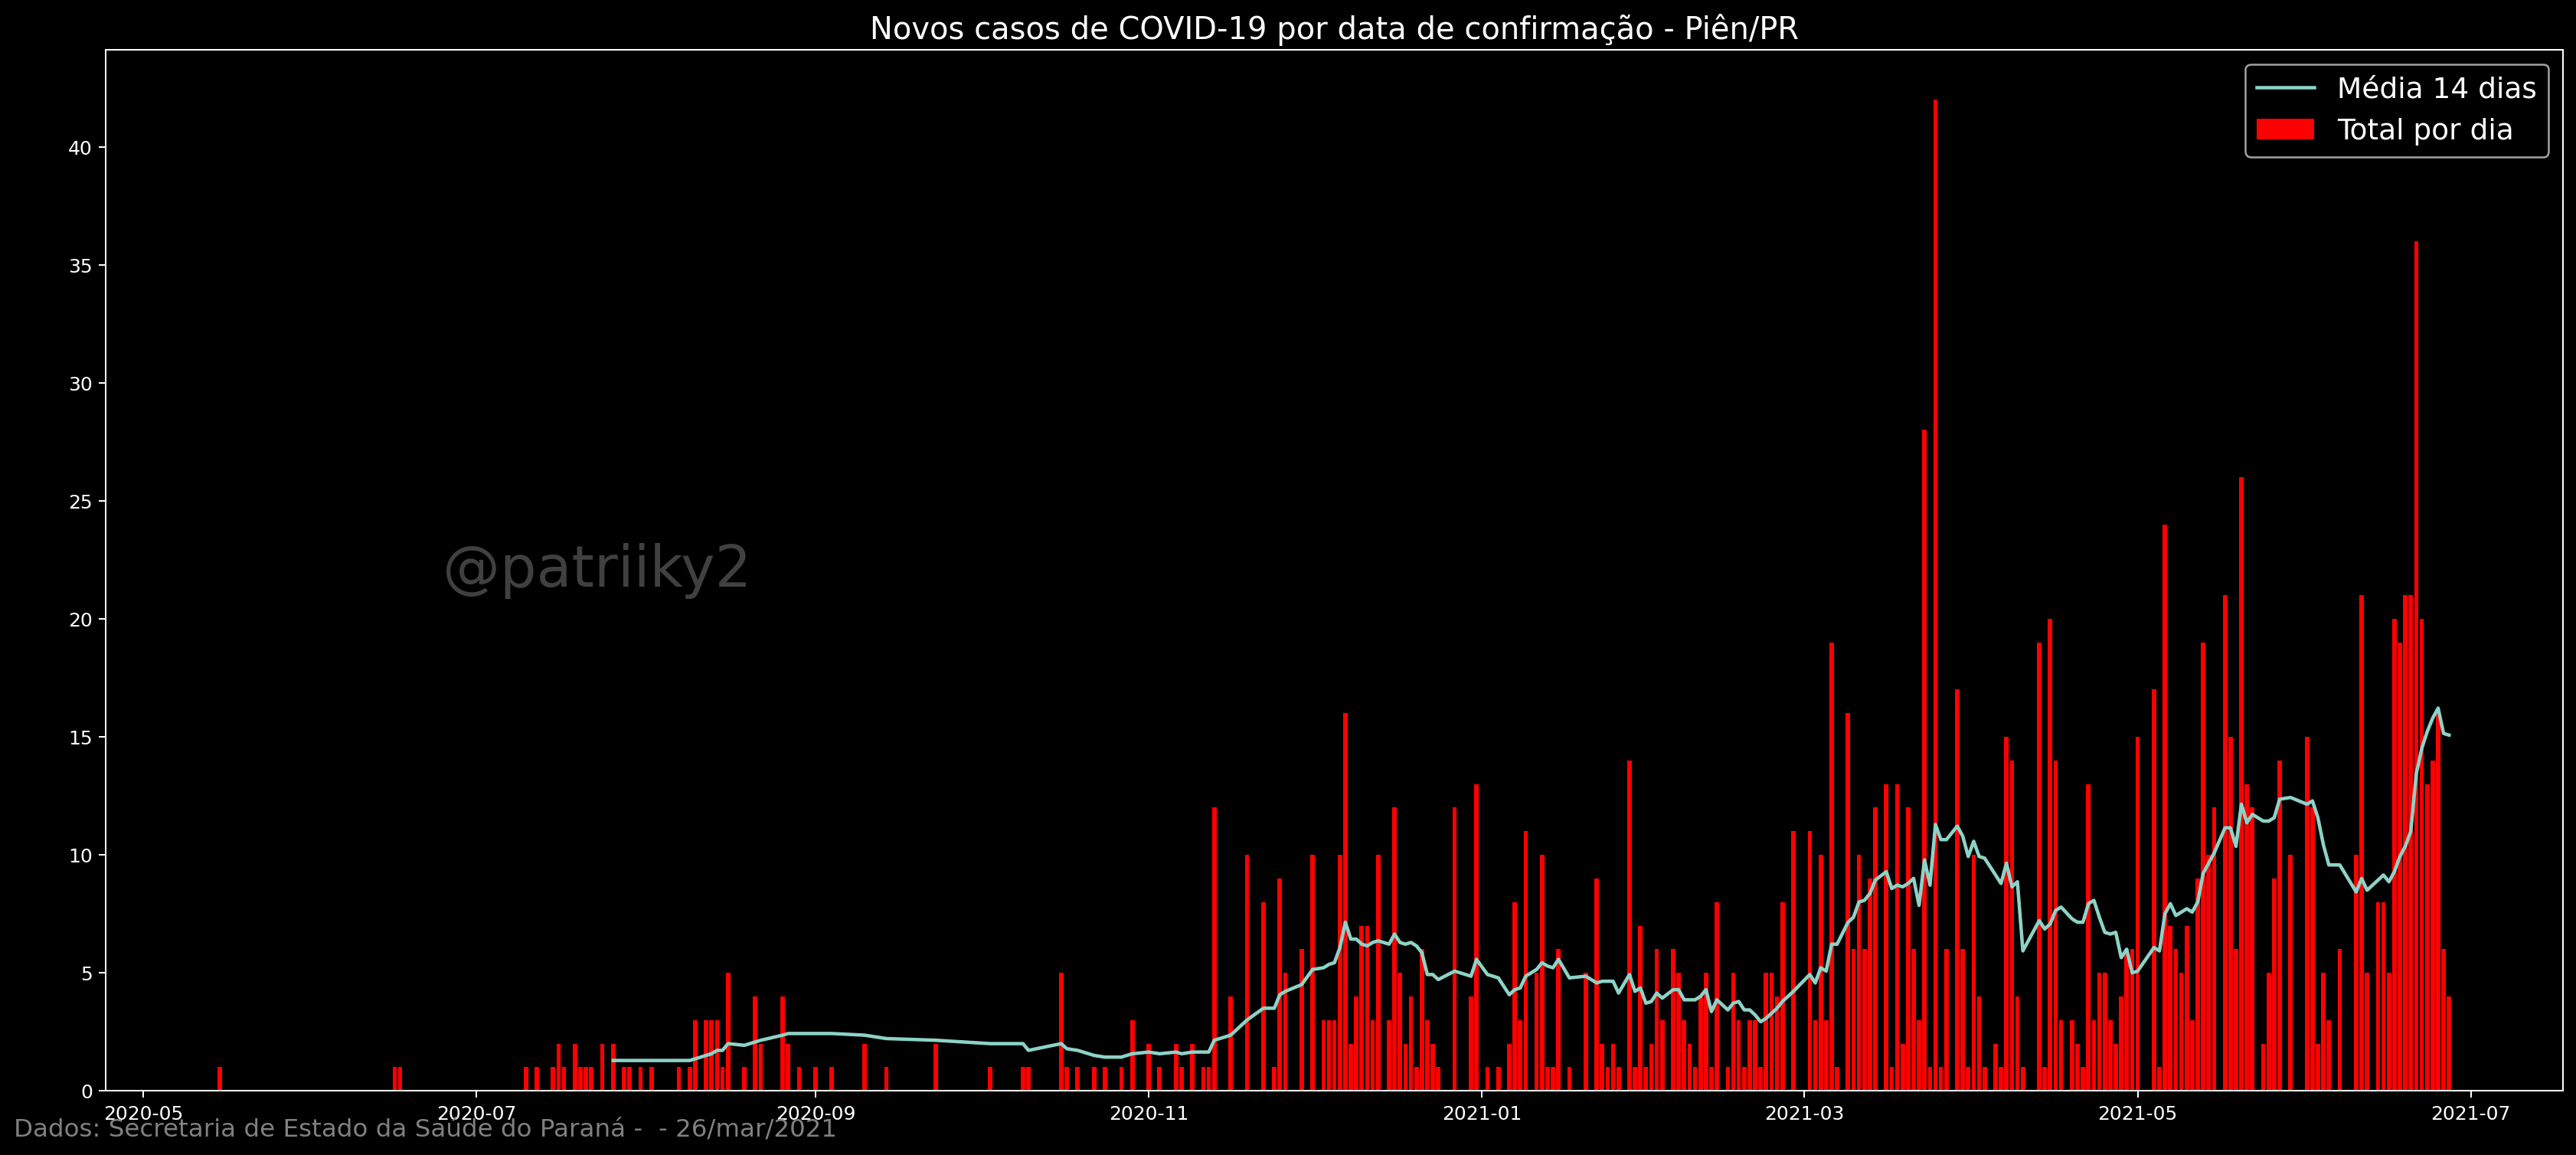

In [30]:
# Plotar utilizando matplotlib
fig, ax = plt.subplots()
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [23, 10]
plt.rcParams['figure.dpi'] = 180


plt.text(0.2, 0.5, '@patriiky2', transform=ax.transAxes,
        fontsize=30, color='gray', alpha=0.5,rotation_mode='anchor',
        ha='center', va='center' )

plt.text(0.13, -0.037, 'Dados: Secretaria de Estado da Saúde do Paraná -  - 26/mar/2021', transform=ax.transAxes,
        fontsize=13, color='gray',rotation_mode='anchor',
        ha='center', va='center' )

# plt.plot(x, casos['QTDE'], label='Total por dia',lw=1)
plt.bar(x,  casos['QTDE'], label='Total por dia',lw=1, color='red')
plt.plot(x, casos['M14'], label='Média 14 dias',lw=1.8)
plt.legend(fontsize=15)
plt.title("Novos casos de COVID-19 por data de confirmação - Piên/PR", fontsize=16)



plt.savefig('novos_casos_dia.png')


In [31]:
# Gráfico Acumulado dos casos:
p2 = figure(title='Casos acumulados de COVID por data de confirmação - Piên/PR',
           x_axis_type="datetime",
           x_axis_label="Data", 
           y_axis_label="Quantidade",
           width=970)
p2.line(x,casos['acumulado'], legend_label='Acumulado', color ='pink') # 

citation = Label(x=320, y=400, x_units='screen', y_units='screen',text_font_size= '25px',
                 text='@patriiky2')

fonte = Label(x=5, y=0, x_units='screen', y_units='screen',text_font_size= '12px',
                 text='Dados: Secretaria da Saúde do Paraná - 26/jun/2021')
p2.add_layout(fonte)
p2.add_layout(citation)


p2.legend.location = 'top_left'
# change border and background of legend
p2.legend.border_line_width = 3
p2.legend.border_line_color = "dimgray"
p2.legend.border_line_alpha = 0.8
p2.legend.background_fill_color = "darkgray"
p2.legend.background_fill_alpha = 0.2

show(p2)

In [46]:
# Total de casos por semana:
periodo = df['DATA_CONFIRMACAO_DIVULGACAO'].dt.to_period('W')
casos_semana = df.groupby(periodo)['QTDE'].count().reset_index()
casos_semana['M14'] = casos_semana.rolling(window=4).mean()


x=casos_semana['DATA_CONFIRMACAO_DIVULGACAO']

p3 = figure(title='Novos casos de COVID-19 por semana - Piên/PR',
           x_axis_type="datetime",
           x_axis_label="Semana", 
           y_axis_label="Quantidade",
           width=970)

p3.vbar(x,top=casos_semana['QTDE'], legend_label="Total por semana", width=24*60*60*1000 , bottom=0,color="firebrick")
p3.line(x,casos_semana['M14'],legend_label="Média 4 semanas",color="yellow")
citation = Label(x=320, y=400, x_units='screen', y_units='screen',text_font_size= '25px',
                 text='@patriiky2')

fonte = Label(x=5, y=0, x_units='screen', y_units='screen',text_font_size= '14px',
                 text='Dados: Secretaria da Saúde do Paraná - 26/jun/2021')
p3.add_layout(fonte)
p3.add_layout(citation)


p3.legend.location = 'top_left'
# change border and background of legend
p3.legend.border_line_width = 3
p3.legend.border_line_color = "dimgray"
p3.legend.border_line_alpha = 0.8
p3.legend.background_fill_color = "darkgray"
p3.legend.background_fill_alpha = 0.2


show(p3)

In [8]:
# Acumulado por semana usando matplotlib:
casos_semana

,DATA_CONFIRMACAO_DIVULGACAO,QTDE,M14
0,2020-05-11/2020-05-17,1,NaN
1,2020-06-15/2020-06-21,2,NaN
2,2020-07-06/2020-07-12,2,NaN
3,2020-07-13/2020-07-19,6,2.75
4,2020-07-20/2020-07-26,7,4.25
5,2020-07-27/2020-08-02,4,4.75
6,2020-08-03/2020-08-09,2,4.75
7,2020-08-10/2020-08-16,18,7.75
8,2020-08-17/2020-08-23,7,7.75
9,2020-08-24/2020-08-30,7,8.50


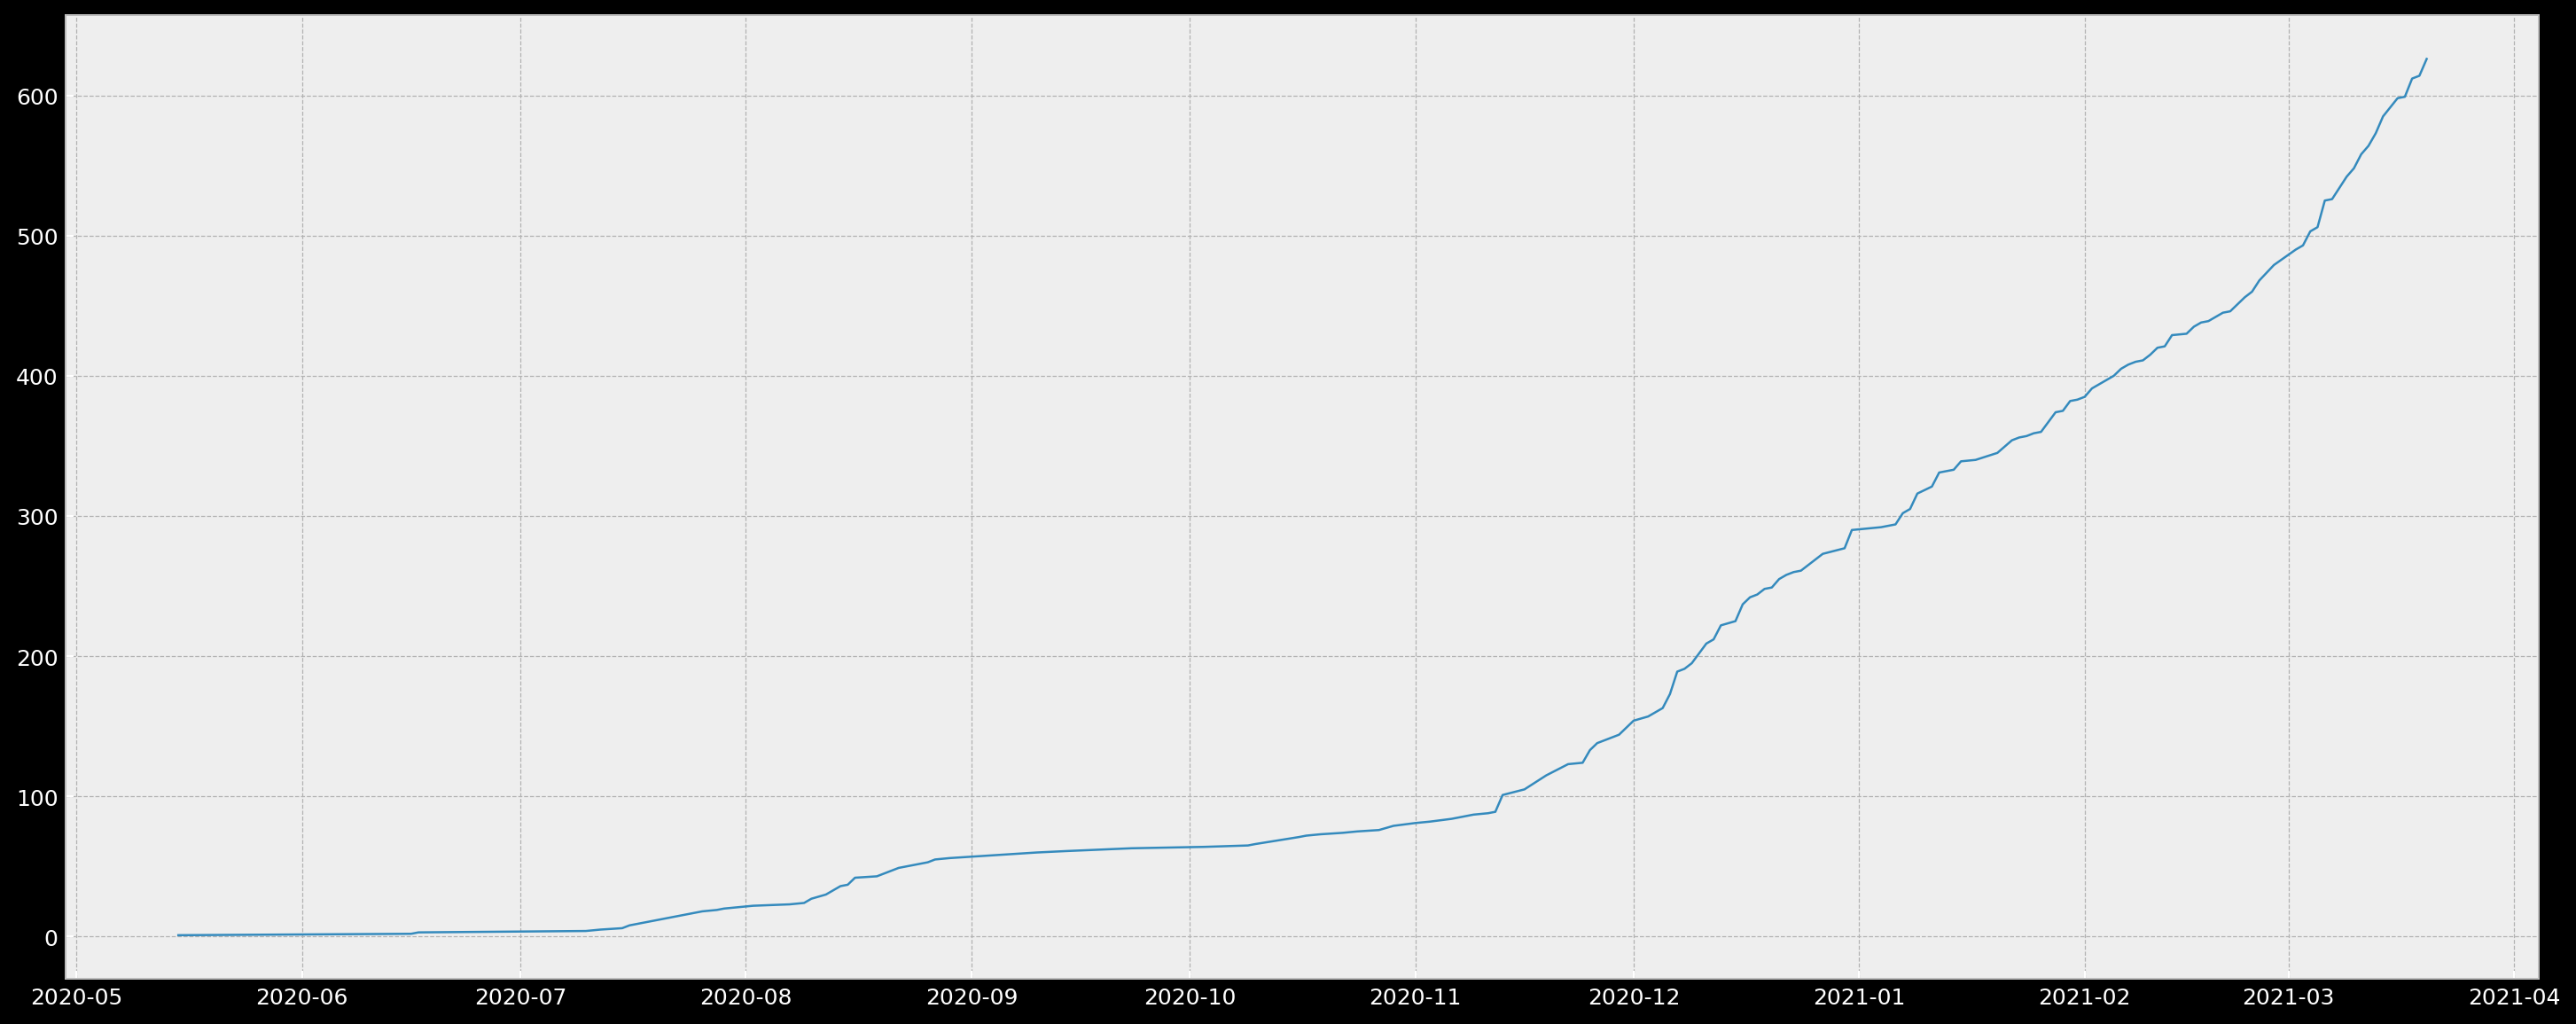

In [222]:
# Plotar utilizando matplotlib
# plt.style.use('bmh')
# plt.rcParams['figure.figsize'] = [18, 8]
# plt.rcParams['figure.dpi'] = 120
plt.plot(x, casos['acumulado'], label='Acumulado',lw=1)

# for index, value in enumerate(casos['acumulado']):
#     if(index%30 == 0):
#         plt.text(value, index, str(int(value)), horizontalalignment='left', size='xx-small')

In [35]:
casos_semana

,DATA_CONFIRMACAO_DIVULGACAO,QTDE,M14
0,2020-05-11/2020-05-17,1,NaN
1,2020-06-15/2020-06-21,2,NaN
2,2020-07-06/2020-07-12,2,NaN
3,2020-07-13/2020-07-19,6,2.75
4,2020-07-20/2020-07-26,7,4.25
5,2020-07-27/2020-08-02,4,4.75
6,2020-08-03/2020-08-09,2,4.75
7,2020-08-10/2020-08-16,18,7.75
8,2020-08-17/2020-08-23,7,7.75
9,2020-08-24/2020-08-30,7,8.50


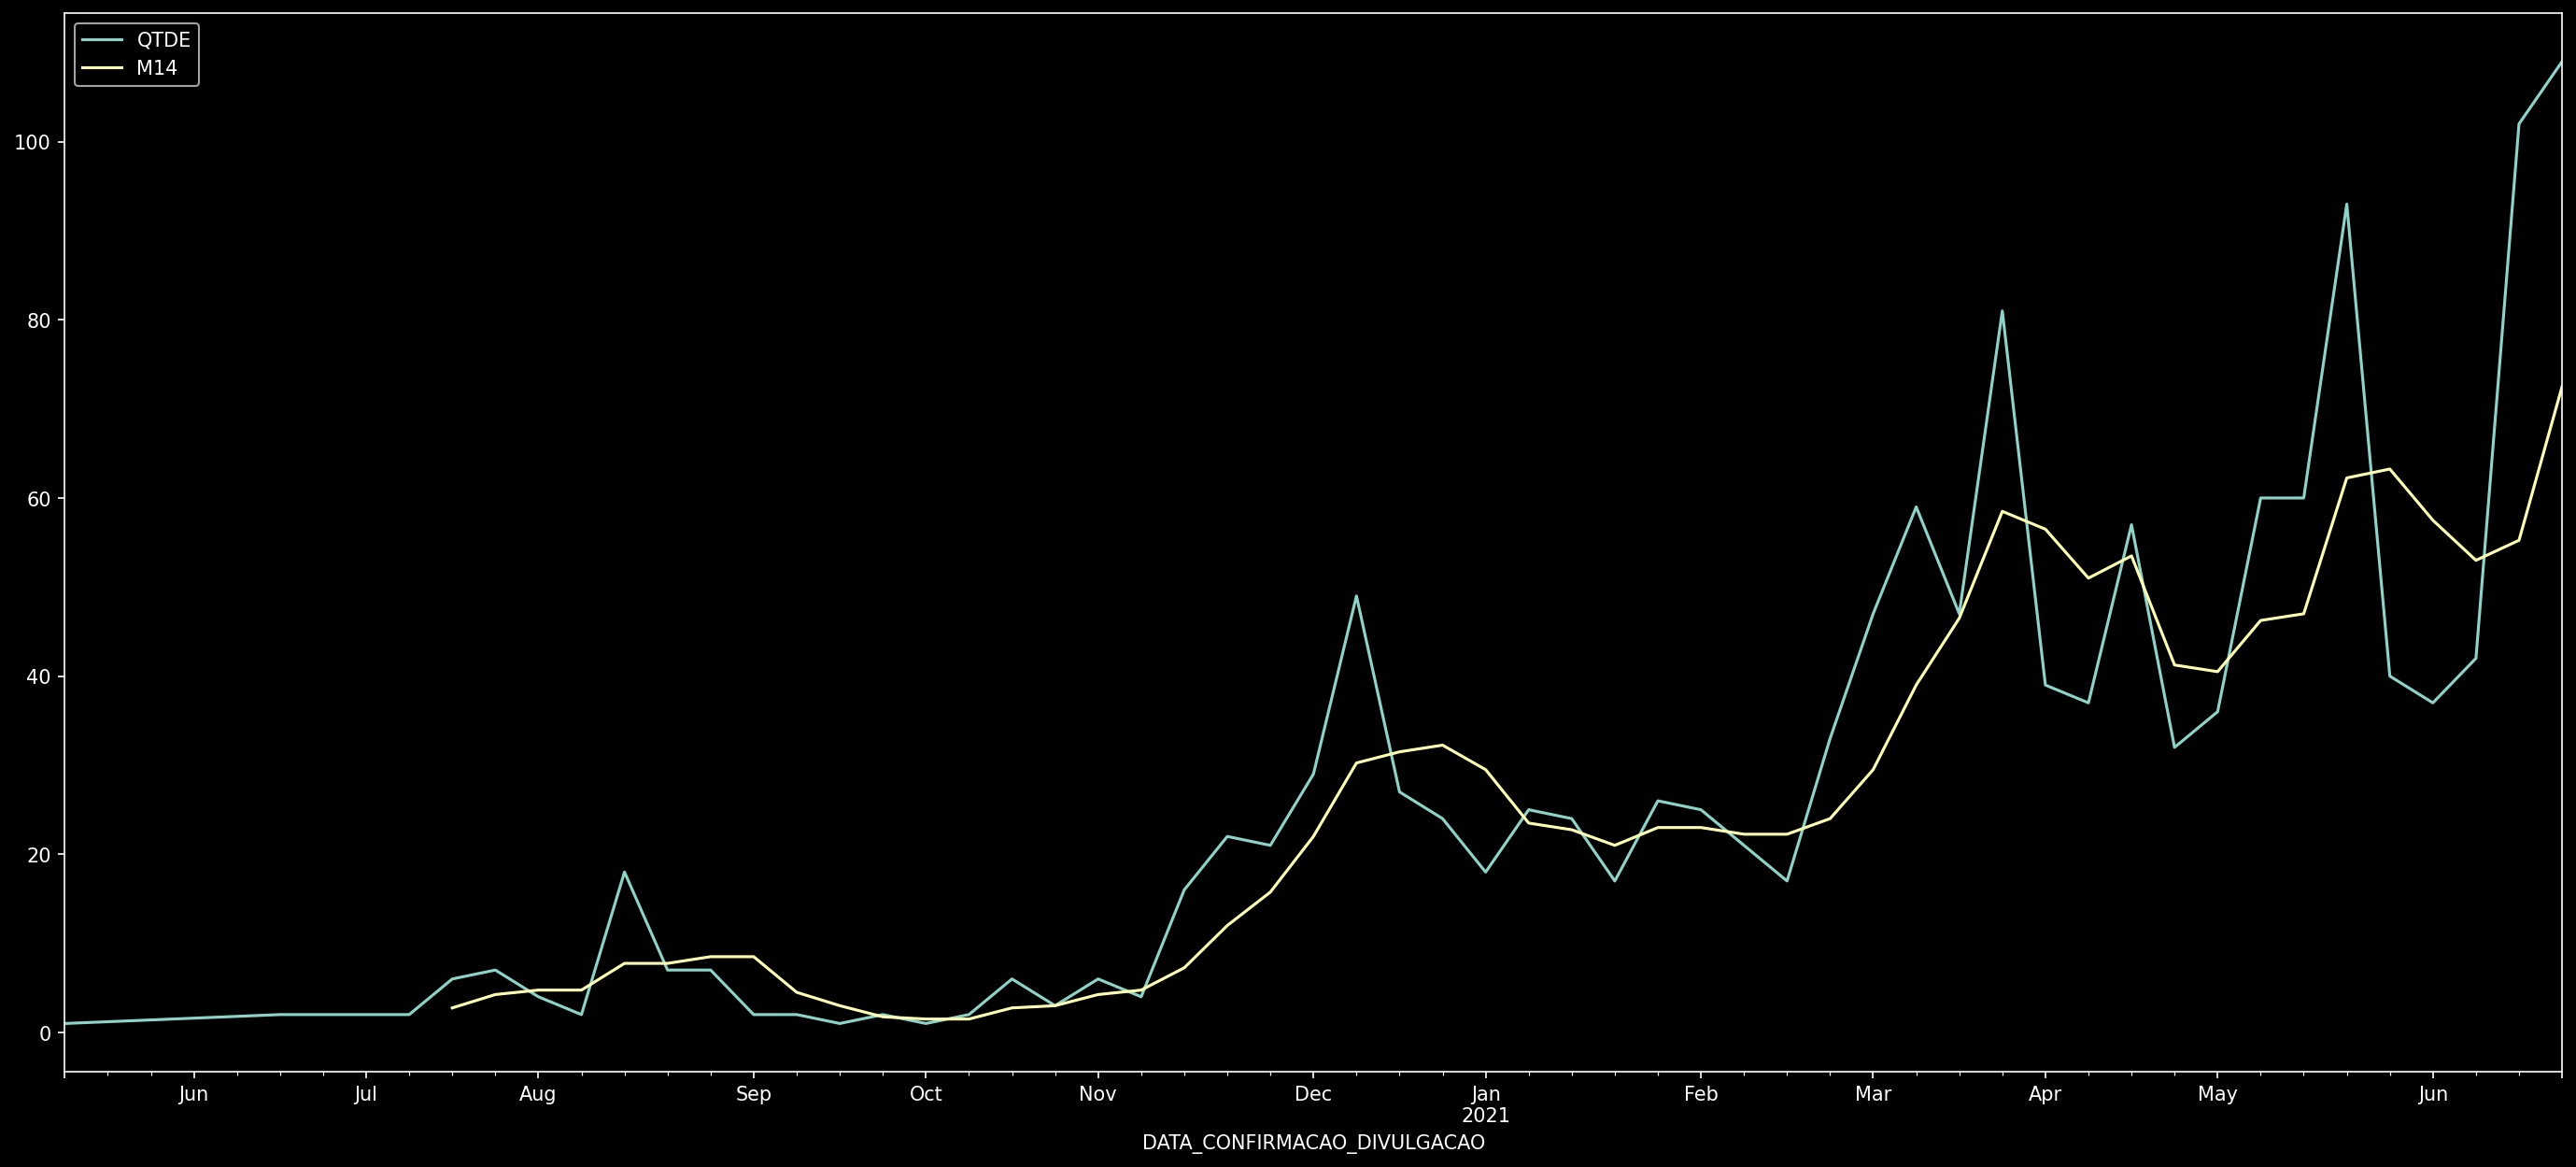

In [37]:
casos_semana.set_index('DATA_CONFIRMACAO_DIVULGACAO').plot()

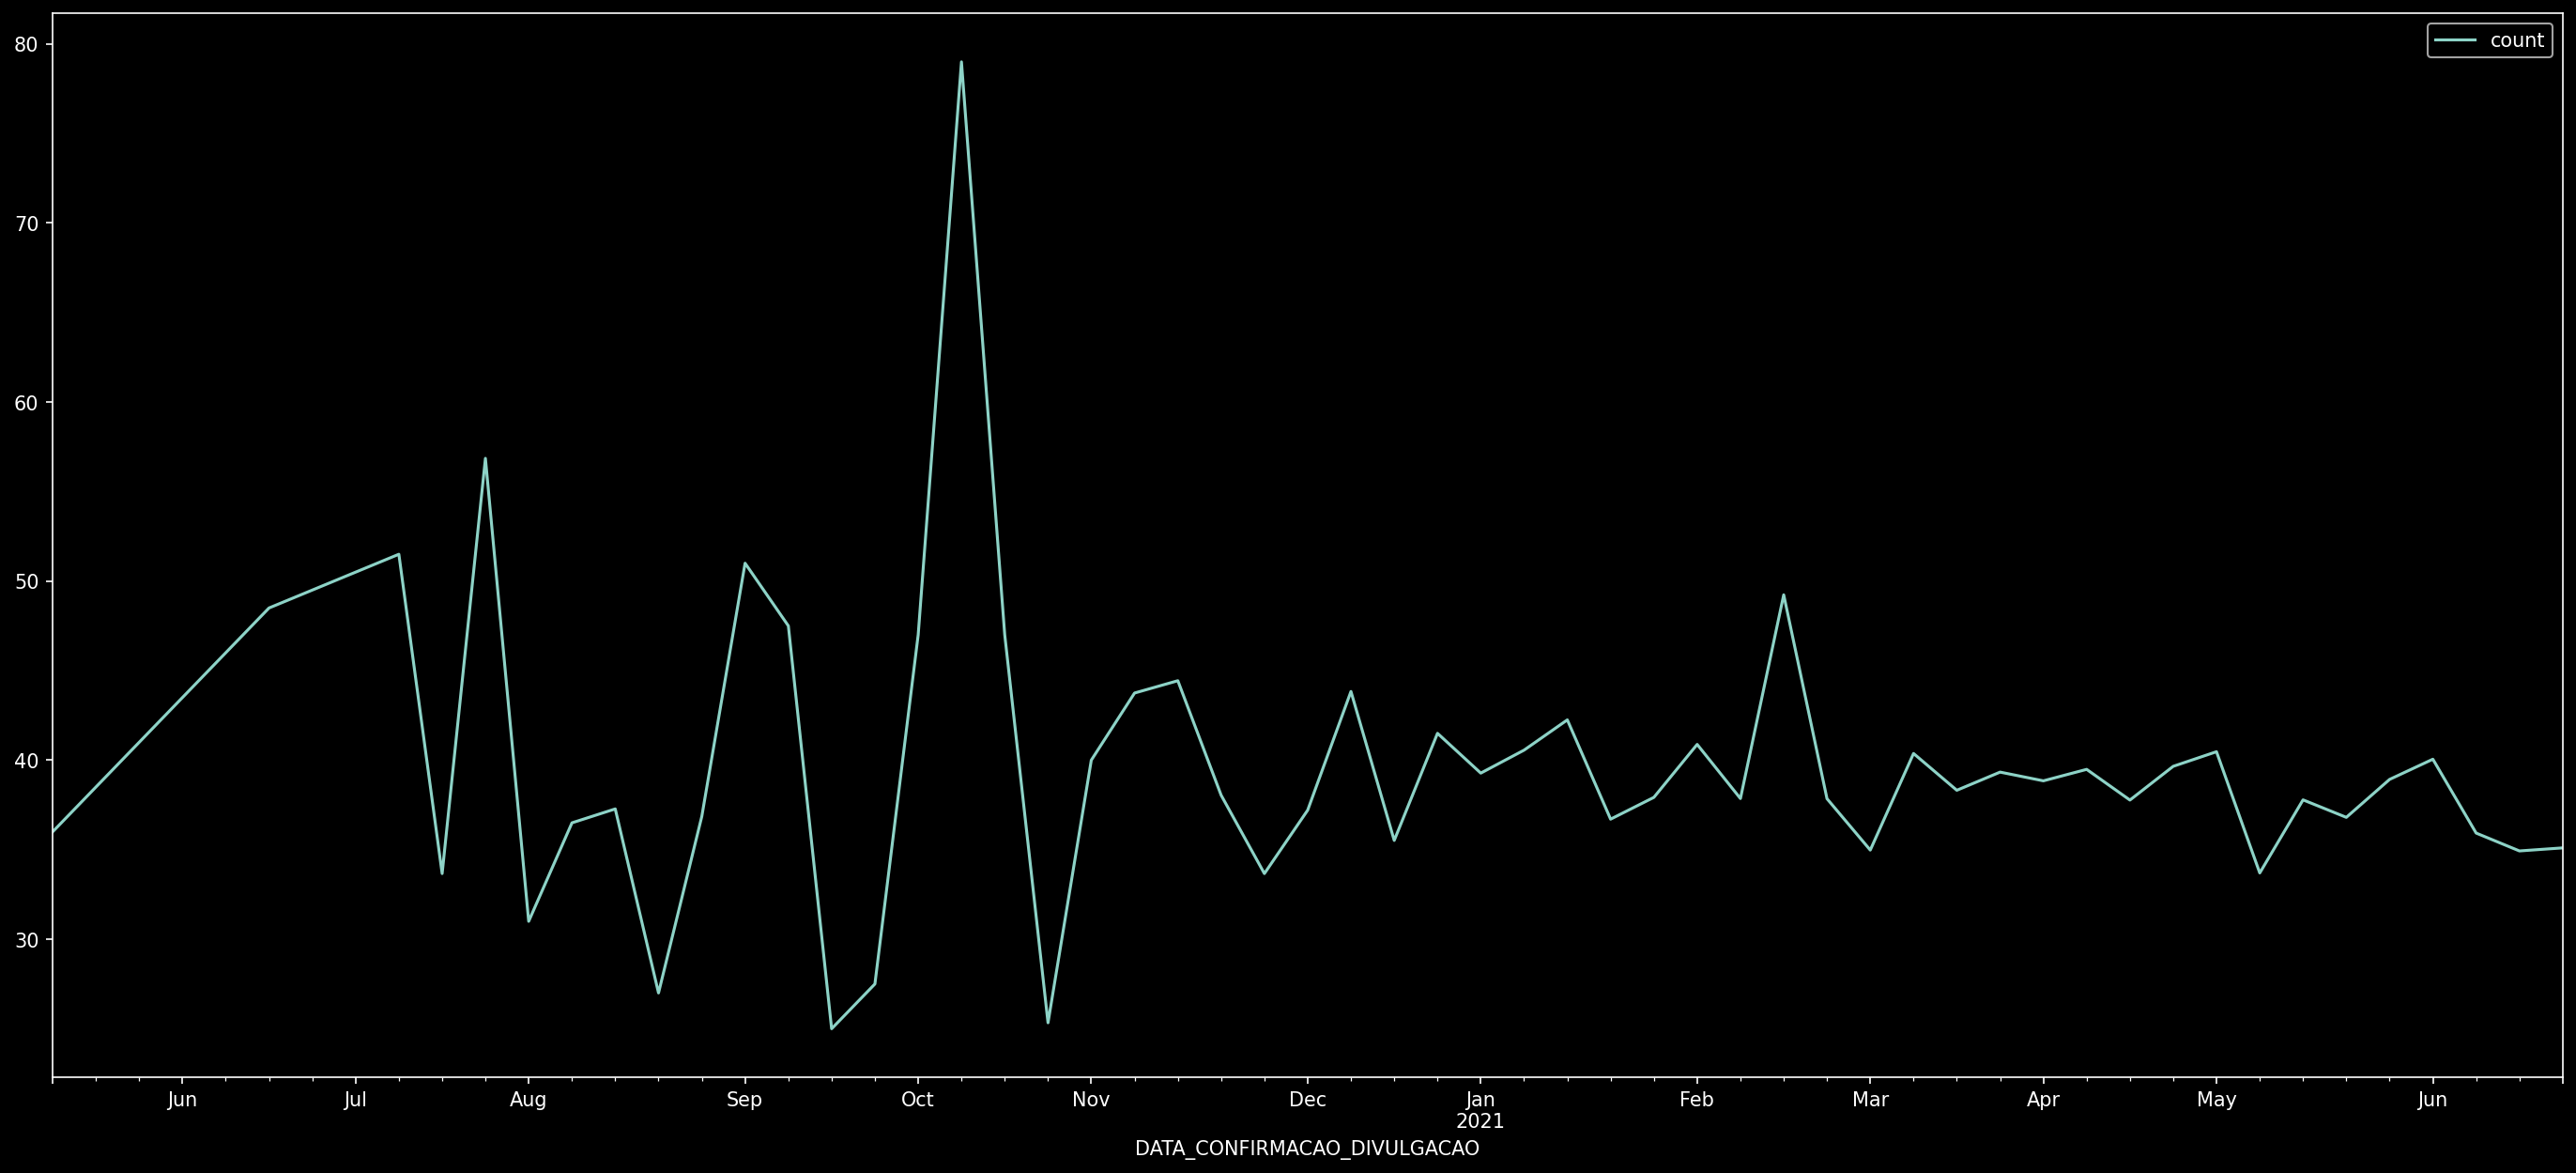

In [34]:
# Média de idade em uma análise temporal:
periodo = df['DATA_CONFIRMACAO_DIVULGACAO'].dt.to_period('W')

df_idade = df[['IDADE_ORIGINAL','SEXO', 'DATA_CONFIRMACAO_DIVULGACAO']]

df_idade = df_idade.groupby(periodo)['IDADE_ORIGINAL'].mean().reset_index(name='count')
df_idade= df_idade.set_index('DATA_CONFIRMACAO_DIVULGACAO')

plt.rcParams['figure.dpi'] = 150


df_idade.plot()






In [132]:
casos.describe()

,QTDE,M7,acumulado
count,150.000000,137.000000,150.000000
mean,4.173333,4.104275,240.526667
std,3.972636,2.027423,185.211205
min,1.000000,1.285714,1.000000
25%,1.000000,2.142857,64.250000
50%,3.000000,4.142857,231.000000
75%,6.000000,5.214286,398.500000
max,19.000000,9.285714,626.000000


In [52]:
df_2021 = df[df['ANO']== 2021]

In [211]:
# Separar por sexo. Plotar ambos em uma série temporal:


In [22]:
df.head()

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO,QTDE,ANO,MES
0,4119103,4119103,F,53,PIEN,PIEN,"COVID-19, Biologia Molecular",2021-05-25,2021-05-26,2021-05-21,Não informado,NaT,NaT,Não informado,NaT,Não informado,1,2021,2021-05
1,4119103,4119103,F,44,PIEN,PIEN,"COVID-19, Biologia Molecular",2021-05-25,2021-05-26,2021-05-18,Não informado,NaT,NaT,Não informado,NaT,Não informado,1,2021,2021-05
2,4119103,4119103,M,57,PIEN,PIEN,"COVID-19, Biologia Molecular",2021-05-25,2021-05-26,2021-05-19,Não informado,NaT,NaT,Não informado,NaT,Não informado,1,2021,2021-05
3,4119103,9999999,M,35,PIEN,IGNORADO/EXTERIOR/IG,"COVID-19, Biologia Molecular",2021-05-25,2021-05-26,2021-05-19,Não informado,NaT,NaT,Não informado,NaT,Não informado,1,2021,2021-05
4,4119103,4119103,F,43,PIEN,PIEN,Teste Rápido Antígeno (Imunocromatografia),2021-05-21,2021-05-26,2021-05-21,Não informado,NaT,NaT,Não informado,NaT,Não informado,1,2021,2021-05


In [24]:
df.groupby('MES')['IDADE_ORIGINAL'].mean()

MES
2020-05    36.000000
2020-06    48.500000
2020-07    45.000000
2020-08    34.514286
2020-09    39.571429
2020-10    46.000000
2020-11    38.415385
2020-12    40.068493
2021-01    39.537634
2021-02    40.656250
2021-03    38.941860
2021-04    38.487654
2021-05    36.872951
Freq: M, Name: IDADE_ORIGINAL, dtype: float64

In [37]:
df.groupby('DATA_CONFIRMACAO_DIVULGACAO')['IDADE_ORIGINAL'].median()

DATA_CONFIRMACAO_DIVULGACAO
2020-05-15    36.0
2020-06-16    40.0
2020-06-17    57.0
2020-07-10    80.0
2020-07-12    23.0
              ... 
2021-05-21    27.0
2021-05-22    30.0
2021-05-24    47.0
2021-05-25    37.0
2021-05-26    51.0
Name: IDADE_ORIGINAL, Length: 208, dtype: float64